In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
ghana=gpd.read_file('/content/Map_of_Regions_in_Ghana.shp')
ghana.head()

Region                                           geometry
0        Ashanti  POLYGON ((686446.075 842986.894, 686666.193 84...
1    Brong Ahafo  POLYGON ((549970.457 968447.094, 550073.003 96...
2        Central  POLYGON ((603176.584 695877.238, 603248.424 69...
3        Eastern  POLYGON ((807307.254 797910.553, 807311.908 79...
4  Greater Accra  POLYGON ((858081.638 676424.913, 858113.115 67...

In [ ]:
print(ghana.crs)
#Data uses EPSG 32630

EPSG:32630


In [ ]:
health_facilities=pd.read_csv('/content/health_facilities.csv')
health_facilities.head()

Region          District             FacilityName           Type  \
0  Ashanti     Offinso North        A.M.E Zion Clinic         Clinic   
1  Ashanti  Bekwai Municipal        Abenkyiman Clinic         Clinic   
2  Ashanti      Adansi North     Aboabo Health Centre  Health Centre   
3  Ashanti     Afigya-Kwabre  Aboabogya Health Centre  Health Centre   
4  Ashanti            Kwabre     Aboaso Health Centre  Health Centre   

           Town   Ownership  Latitude  Longitude  
0      Afrancho        CHAG   7.40801   -1.96317  
1  Anwiankwanta     Private   6.46312   -1.58592  
2   Aboabo No 2  Government   6.22393   -1.34982  
3     Aboabogya  Government   6.84177   -1.61098  
4        Aboaso  Government   6.84177   -1.61098

In [ ]:
# Converting the df to GeoDataFrame
facilities= gpd.GeoDataFrame(health_facilities, geometry=gpd.points_from_xy(health_facilities.Longitude, health_facilities.Latitude))
#Setting coordinate reference system to EPSG 4326
facilities.crs = {'init': 'epsg:4326'}
facilities.head()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:751: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


Region          District             FacilityName           Type  \
0  Ashanti     Offinso North        A.M.E Zion Clinic         Clinic   
1  Ashanti  Bekwai Municipal        Abenkyiman Clinic         Clinic   
2  Ashanti      Adansi North     Aboabo Health Centre  Health Centre   
3  Ashanti     Afigya-Kwabre  Aboabogya Health Centre  Health Centre   
4  Ashanti            Kwabre     Aboaso Health Centre  Health Centre   

           Town   Ownership  Latitude  Longitude                  geometry  
0      Afrancho        CHAG   7.40801   -1.96317  POINT (-1.96317 7.40801)  
1  Anwiankwanta     Private   6.46312   -1.58592  POINT (-1.58592 6.46312)  
2   Aboabo No 2  Government   6.22393   -1.34982  POINT (-1.34982 6.22393)  
3     Aboabogya  Government   6.84177   -1.61098  POINT (-1.61098 6.84177)  
4        Aboaso  Government   6.84177   -1.61098  POINT (-1.61098 6.84177)

<Axes: >

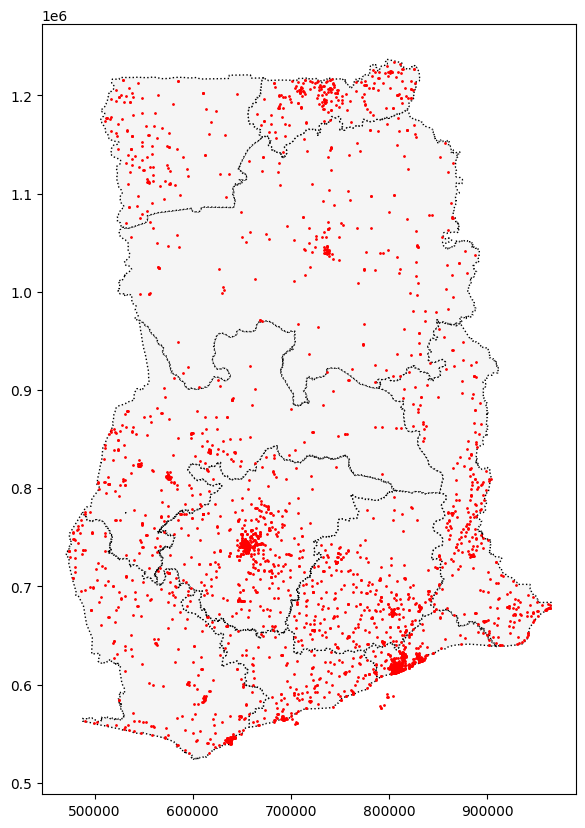

In [ ]:
ax = ghana.plot(figsize=(10,10), color='whitesmoke', linestyle=':', edgecolor='black')
#Ensuring crs is same
facilities.to_crs(epsg=32630).plot(ax=ax, color='red',markersize=1)

In [ ]:
# x-coordinates of each point
facilities.geometry.head().x

0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

In [ ]:
# Calculating area of each polygon(region) in Ghana
ghana.loc[:,'AREA']=ghana.geometry.area/10**6

 #Area of ghana:
print("Area of Ghana: {} square kilometers".format(ghana.AREA.sum()))
ghana.head()


Area of Ghana: 239584.5760055668 square kilometers


Region                                           geometry  \
0        Ashanti  POLYGON ((686446.075 842986.894, 686666.193 84...   
1    Brong Ahafo  POLYGON ((549970.457 968447.094, 550073.003 96...   
2        Central  POLYGON ((603176.584 695877.238, 603248.424 69...   
3        Eastern  POLYGON ((807307.254 797910.553, 807311.908 79...   
4  Greater Accra  POLYGON ((858081.638 676424.913, 858113.115 67...   

           AREA  
0  24379.017777  
1  40098.168231  
2   9665.626760  
3  18987.625847  
4   3706.511145